# To visualize the activation map
1. the activation map before GAP with method of summing up the activation map along channel then followed a spatial L2 normalization 
2. the activation map before GAP with method of averaging the activation map along channel when the attention convolution is added

### loading package

In [1]:
from PIL import Image
import numpy as np

import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from model.OSNetv2 import osnet_x1_0
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
from data import data_manager
from config.config_manager import _C as cfg
from tools.logger import setup_logger
logger = setup_logger(".")
cfg.merge_from_file("../par.yml")
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid/"

In [2]:
from model.managers.manager_par import PARManager
cfg.EVALUATE = "/home/allen/OSNet_par_bces_SGD_lr_0.01_warmup_10_0.33_cosine_2_10_flip_crop_imagenet1.7485.pth"
model = PARManager(cfg)

2019-09-04 14:46:04,763 logger INFO: Evaluating model from /home/allen/OSNet_par_bces_SGD_lr_0.01_warmup_10_0.33_cosine_2_10_flip_crop_imagenet1.7485.pth
2019-09-04 14:46:07,338 logger INFO: opt_0 is skipped
2019-09-04 14:46:07,342 logger INFO: backbone.conv1.conv.weight                                   ...... loaded
2019-09-04 14:46:07,343 logger INFO: backbone.conv1.bn.weight                                     ...... loaded
2019-09-04 14:46:07,344 logger INFO: backbone.conv1.bn.bias                                       ...... loaded
2019-09-04 14:46:07,345 logger INFO: backbone.conv1.bn.running_mean                               ...... loaded
2019-09-04 14:46:07,346 logger INFO: backbone.conv1.bn.running_var                                ...... loaded
2019-09-04 14:46:07,348 logger INFO: backbone.conv1.bn.num_batches_tracked                        ...... loaded
2019-09-04 14:46:07,349 logger INFO: backbone.conv2.0.conv1.conv.weight                           ...... loaded
2019-09-

2019-09-04 14:46:07,436 logger INFO: backbone.conv2.0.conv2d.2.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,438 logger INFO: backbone.conv2.0.conv2d.2.bn.running_var                     ...... loaded
2019-09-04 14:46:07,439 logger INFO: backbone.conv2.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,441 logger INFO: backbone.conv2.0.conv2d.3.conv1.weight                       ...... loaded
2019-09-04 14:46:07,442 logger INFO: backbone.conv2.0.conv2d.3.conv2.weight                       ...... loaded
2019-09-04 14:46:07,443 logger INFO: backbone.conv2.0.conv2d.3.bn.weight                          ...... loaded
2019-09-04 14:46:07,445 logger INFO: backbone.conv2.0.conv2d.3.bn.bias                            ...... loaded
2019-09-04 14:46:07,446 logger INFO: backbone.conv2.0.conv2d.3.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,447 logger INFO: backbone.conv2.0.conv2d.3.bn.running_var                     ......

2019-09-04 14:46:07,536 logger INFO: backbone.conv2.1.conv2d.0.conv1.weight                       ...... loaded
2019-09-04 14:46:07,536 logger INFO: backbone.conv2.1.conv2d.0.conv2.weight                       ...... loaded
2019-09-04 14:46:07,537 logger INFO: backbone.conv2.1.conv2d.0.bn.weight                          ...... loaded
2019-09-04 14:46:07,538 logger INFO: backbone.conv2.1.conv2d.0.bn.bias                            ...... loaded
2019-09-04 14:46:07,539 logger INFO: backbone.conv2.1.conv2d.0.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,540 logger INFO: backbone.conv2.1.conv2d.0.bn.running_var                     ...... loaded
2019-09-04 14:46:07,542 logger INFO: backbone.conv2.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,543 logger INFO: backbone.conv2.1.conv2d.1.conv1.weight                       ...... loaded
2019-09-04 14:46:07,544 logger INFO: backbone.conv2.1.conv2d.1.conv2.weight                       ......

2019-09-04 14:46:07,629 logger INFO: backbone.conv3.0.conv2c.0.bn.bias                            ...... loaded
2019-09-04 14:46:07,630 logger INFO: backbone.conv3.0.conv2c.0.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,631 logger INFO: backbone.conv3.0.conv2c.0.bn.running_var                     ...... loaded
2019-09-04 14:46:07,632 logger INFO: backbone.conv3.0.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,633 logger INFO: backbone.conv3.0.conv2c.1.conv1.weight                       ...... loaded
2019-09-04 14:46:07,634 logger INFO: backbone.conv3.0.conv2c.1.conv2.weight                       ...... loaded
2019-09-04 14:46:07,635 logger INFO: backbone.conv3.0.conv2c.1.bn.weight                          ...... loaded
2019-09-04 14:46:07,636 logger INFO: backbone.conv3.0.conv2c.1.bn.bias                            ...... loaded
2019-09-04 14:46:07,637 logger INFO: backbone.conv3.0.conv2c.1.bn.running_mean                    ......

2019-09-04 14:46:07,711 logger INFO: backbone.conv3.1.conv2a.bn.num_batches_tracked               ...... loaded
2019-09-04 14:46:07,712 logger INFO: backbone.conv3.1.conv2b.0.conv1.weight                       ...... loaded
2019-09-04 14:46:07,713 logger INFO: backbone.conv3.1.conv2b.0.conv2.weight                       ...... loaded
2019-09-04 14:46:07,714 logger INFO: backbone.conv3.1.conv2b.0.bn.weight                          ...... loaded
2019-09-04 14:46:07,716 logger INFO: backbone.conv3.1.conv2b.0.bn.bias                            ...... loaded
2019-09-04 14:46:07,717 logger INFO: backbone.conv3.1.conv2b.0.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,718 logger INFO: backbone.conv3.1.conv2b.0.bn.running_var                     ...... loaded
2019-09-04 14:46:07,718 logger INFO: backbone.conv3.1.conv2b.0.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,720 logger INFO: backbone.conv3.1.conv2b.1.conv1.weight                       ......

2019-09-04 14:46:07,788 logger INFO: backbone.conv3.2.0.conv.weight                               ...... loaded
2019-09-04 14:46:07,788 logger INFO: backbone.conv3.2.0.bn.weight                                 ...... loaded
2019-09-04 14:46:07,789 logger INFO: backbone.conv3.2.0.bn.bias                                   ...... loaded
2019-09-04 14:46:07,790 logger INFO: backbone.conv3.2.0.bn.running_mean                           ...... loaded
2019-09-04 14:46:07,791 logger INFO: backbone.conv3.2.0.bn.running_var                            ...... loaded
2019-09-04 14:46:07,792 logger INFO: backbone.conv3.2.0.bn.num_batches_tracked                    ...... loaded
2019-09-04 14:46:07,793 logger INFO: backbone.conv4.0.conv1.conv.weight                           ...... loaded
2019-09-04 14:46:07,795 logger INFO: backbone.conv4.0.conv1.bn.weight                             ...... loaded
2019-09-04 14:46:07,796 logger INFO: backbone.conv4.0.conv1.bn.bias                               ......

2019-09-04 14:46:07,862 logger INFO: backbone.conv4.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,863 logger INFO: backbone.conv4.0.conv2d.3.conv1.weight                       ...... loaded
2019-09-04 14:46:07,864 logger INFO: backbone.conv4.0.conv2d.3.conv2.weight                       ...... loaded
2019-09-04 14:46:07,865 logger INFO: backbone.conv4.0.conv2d.3.bn.weight                          ...... loaded
2019-09-04 14:46:07,866 logger INFO: backbone.conv4.0.conv2d.3.bn.bias                            ...... loaded
2019-09-04 14:46:07,867 logger INFO: backbone.conv4.0.conv2d.3.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,868 logger INFO: backbone.conv4.0.conv2d.3.bn.running_var                     ...... loaded
2019-09-04 14:46:07,869 logger INFO: backbone.conv4.0.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,870 logger INFO: backbone.conv4.0.gate.fc1.weight                             ......

2019-09-04 14:46:07,940 logger INFO: backbone.conv4.1.conv2d.0.bn.weight                          ...... loaded
2019-09-04 14:46:07,941 logger INFO: backbone.conv4.1.conv2d.0.bn.bias                            ...... loaded
2019-09-04 14:46:07,942 logger INFO: backbone.conv4.1.conv2d.0.bn.running_mean                    ...... loaded
2019-09-04 14:46:07,943 logger INFO: backbone.conv4.1.conv2d.0.bn.running_var                     ...... loaded
2019-09-04 14:46:07,944 logger INFO: backbone.conv4.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-09-04 14:46:07,945 logger INFO: backbone.conv4.1.conv2d.1.conv1.weight                       ...... loaded
2019-09-04 14:46:07,946 logger INFO: backbone.conv4.1.conv2d.1.conv2.weight                       ...... loaded
2019-09-04 14:46:07,946 logger INFO: backbone.conv4.1.conv2d.1.bn.weight                          ...... loaded
2019-09-04 14:46:07,947 logger INFO: backbone.conv4.1.conv2d.1.bn.bias                            ......

In [53]:
for n, p in model.model.named_modules():
    p.name = n.split("backbone.")[-1].replace(".", "_")
    if isinstance(p, torch.nn.Conv2d):
        print("{:40} ----> {}".format(n, p.name))        
        print("{:40} ----> {}x{}x{}x{}, s={}, p={}\n".format(" ", p.in_channels, 
                                               p.out_channels, 
                                               p.kernel_size[0], p.kernel_size[1],
                                               p.stride[0],
                                               p.padding[0]))

backbone.conv1.conv                      ----> conv1_conv
                                         ----> 3x64x7x7, s=2, p=3

backbone.conv2.0.conv1.conv              ----> conv2_0_conv1_conv
                                         ----> 64x64x1x1, s=1, p=0

backbone.conv2.0.conv2a.conv1            ----> conv2_0_conv2a_conv1
                                         ----> 64x64x1x1, s=1, p=0

backbone.conv2.0.conv2a.conv2            ----> conv2_0_conv2a_conv2
                                         ----> 64x64x3x3, s=1, p=1

backbone.conv2.0.conv2b.0.conv1          ----> conv2_0_conv2b_0_conv1
                                         ----> 64x64x1x1, s=1, p=0

backbone.conv2.0.conv2b.0.conv2          ----> conv2_0_conv2b_0_conv2
                                         ----> 64x64x3x3, s=1, p=1

backbone.conv2.0.conv2b.1.conv1          ----> conv2_0_conv2b_1_conv1
                                         ----> 64x64x1x1, s=1, p=0

backbone.conv2.0.conv2b.1.conv2          ----> conv2_0_

In [48]:
model.model.backbone.conv2[0]

OSBlock(
  (conv1): Conv1x1(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
  )
  (conv2a): LightConv3x3(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
  )
  (conv2b): Sequential(
    (0): LightConv3x3(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
    )
    (1): LightConv3x3(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [18]:
for i in model.model.backbone.conv1.children():
    print(i)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace)


In [3]:
import torch.nn as nn
import torch.nn.functional as F
from model.managers.trick_att_manager import AttentionManager

model = AttentionManager(cfg)

2019-08-21 10:53:25,332 logger INFO: Resuming model from /home/allen/Downloads/osnet_x1_0_imagenet.pth
2019-08-21 10:53:25,369 logger INFO: conv1.conv.weight                                            ...... loaded
2019-08-21 10:53:25,370 logger INFO: conv1.bn.weight                                              ...... loaded
2019-08-21 10:53:25,372 logger INFO: conv1.bn.bias                                                ...... loaded
2019-08-21 10:53:25,372 logger INFO: conv1.bn.running_mean                                        ...... loaded
2019-08-21 10:53:25,374 logger INFO: conv1.bn.running_var                                         ...... loaded
2019-08-21 10:53:25,375 logger INFO: conv1.bn.num_batches_tracked                                 ...... loaded
2019-08-21 10:53:25,376 logger INFO: conv2.0.conv1.conv.weight                                    ...... loaded
2019-08-21 10:53:25,377 logger INFO: conv2.0.conv1.bn.weight                                      ...... loaded
2

2019-08-21 10:53:25,460 logger INFO: conv2.0.conv2d.2.bn.running_var                              ...... loaded
2019-08-21 10:53:25,461 logger INFO: conv2.0.conv2d.2.bn.num_batches_tracked                      ...... loaded
2019-08-21 10:53:25,462 logger INFO: conv2.0.conv2d.3.conv1.weight                                ...... loaded
2019-08-21 10:53:25,463 logger INFO: conv2.0.conv2d.3.conv2.weight                                ...... loaded
2019-08-21 10:53:25,464 logger INFO: conv2.0.conv2d.3.bn.weight                                   ...... loaded
2019-08-21 10:53:25,465 logger INFO: conv2.0.conv2d.3.bn.bias                                     ...... loaded
2019-08-21 10:53:25,466 logger INFO: conv2.0.conv2d.3.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,467 logger INFO: conv2.0.conv2d.3.bn.running_var                              ...... loaded
2019-08-21 10:53:25,468 logger INFO: conv2.0.conv2d.3.bn.num_batches_tracked                      ......

2019-08-21 10:53:25,550 logger INFO: conv2.1.conv2d.0.conv2.weight                                ...... loaded
2019-08-21 10:53:25,551 logger INFO: conv2.1.conv2d.0.bn.weight                                   ...... loaded
2019-08-21 10:53:25,552 logger INFO: conv2.1.conv2d.0.bn.bias                                     ...... loaded
2019-08-21 10:53:25,554 logger INFO: conv2.1.conv2d.0.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,555 logger INFO: conv2.1.conv2d.0.bn.running_var                              ...... loaded
2019-08-21 10:53:25,556 logger INFO: conv2.1.conv2d.0.bn.num_batches_tracked                      ...... loaded
2019-08-21 10:53:25,557 logger INFO: conv2.1.conv2d.1.conv1.weight                                ...... loaded
2019-08-21 10:53:25,559 logger INFO: conv2.1.conv2d.1.conv2.weight                                ...... loaded
2019-08-21 10:53:25,560 logger INFO: conv2.1.conv2d.1.bn.weight                                   ......

2019-08-21 10:53:25,628 logger INFO: conv3.0.conv2c.0.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,629 logger INFO: conv3.0.conv2c.0.bn.running_var                              ...... loaded
2019-08-21 10:53:25,630 logger INFO: conv3.0.conv2c.0.bn.num_batches_tracked                      ...... loaded
2019-08-21 10:53:25,631 logger INFO: conv3.0.conv2c.1.conv1.weight                                ...... loaded
2019-08-21 10:53:25,632 logger INFO: conv3.0.conv2c.1.conv2.weight                                ...... loaded
2019-08-21 10:53:25,633 logger INFO: conv3.0.conv2c.1.bn.weight                                   ...... loaded
2019-08-21 10:53:25,634 logger INFO: conv3.0.conv2c.1.bn.bias                                     ...... loaded
2019-08-21 10:53:25,635 logger INFO: conv3.0.conv2c.1.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,637 logger INFO: conv3.0.conv2c.1.bn.running_var                              ......

2019-08-21 10:53:25,715 logger INFO: conv3.1.conv2b.0.conv1.weight                                ...... loaded
2019-08-21 10:53:25,716 logger INFO: conv3.1.conv2b.0.conv2.weight                                ...... loaded
2019-08-21 10:53:25,717 logger INFO: conv3.1.conv2b.0.bn.weight                                   ...... loaded
2019-08-21 10:53:25,718 logger INFO: conv3.1.conv2b.0.bn.bias                                     ...... loaded
2019-08-21 10:53:25,719 logger INFO: conv3.1.conv2b.0.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,720 logger INFO: conv3.1.conv2b.0.bn.running_var                              ...... loaded
2019-08-21 10:53:25,726 logger INFO: conv3.1.conv2b.0.bn.num_batches_tracked                      ...... loaded
2019-08-21 10:53:25,727 logger INFO: conv3.1.conv2b.1.conv1.weight                                ...... loaded
2019-08-21 10:53:25,728 logger INFO: conv3.1.conv2b.1.conv2.weight                                ......

2019-08-21 10:53:25,810 logger INFO: conv3.2.0.bn.weight                                          ...... loaded
2019-08-21 10:53:25,811 logger INFO: conv3.2.0.bn.bias                                            ...... loaded
2019-08-21 10:53:25,812 logger INFO: conv3.2.0.bn.running_mean                                    ...... loaded
2019-08-21 10:53:25,814 logger INFO: conv3.2.0.bn.running_var                                     ...... loaded
2019-08-21 10:53:25,815 logger INFO: conv3.2.0.bn.num_batches_tracked                             ...... loaded
2019-08-21 10:53:25,816 logger INFO: conv4.0.conv1.conv.weight                                    ...... loaded
2019-08-21 10:53:25,818 logger INFO: conv4.0.conv1.bn.weight                                      ...... loaded
2019-08-21 10:53:25,820 logger INFO: conv4.0.conv1.bn.bias                                        ...... loaded
2019-08-21 10:53:25,821 logger INFO: conv4.0.conv1.bn.running_mean                                ......

2019-08-21 10:53:25,901 logger INFO: conv4.0.conv2d.3.conv1.weight                                ...... loaded
2019-08-21 10:53:25,902 logger INFO: conv4.0.conv2d.3.conv2.weight                                ...... loaded
2019-08-21 10:53:25,903 logger INFO: conv4.0.conv2d.3.bn.weight                                   ...... loaded
2019-08-21 10:53:25,904 logger INFO: conv4.0.conv2d.3.bn.bias                                     ...... loaded
2019-08-21 10:53:25,905 logger INFO: conv4.0.conv2d.3.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,906 logger INFO: conv4.0.conv2d.3.bn.running_var                              ...... loaded
2019-08-21 10:53:25,907 logger INFO: conv4.0.conv2d.3.bn.num_batches_tracked                      ...... loaded
2019-08-21 10:53:25,908 logger INFO: conv4.0.gate.fc1.weight                                      ...... loaded
2019-08-21 10:53:25,909 logger INFO: conv4.0.gate.fc1.bias                                        ......

2019-08-21 10:53:25,988 logger INFO: conv4.1.conv2d.0.bn.bias                                     ...... loaded
2019-08-21 10:53:25,989 logger INFO: conv4.1.conv2d.0.bn.running_mean                             ...... loaded
2019-08-21 10:53:25,990 logger INFO: conv4.1.conv2d.0.bn.running_var                              ...... loaded
2019-08-21 10:53:25,992 logger INFO: conv4.1.conv2d.0.bn.num_batches_tracked                      ...... loaded
2019-08-21 10:53:25,993 logger INFO: conv4.1.conv2d.1.conv1.weight                                ...... loaded
2019-08-21 10:53:25,994 logger INFO: conv4.1.conv2d.1.conv2.weight                                ...... loaded
2019-08-21 10:53:25,995 logger INFO: conv4.1.conv2d.1.bn.weight                                   ...... loaded
2019-08-21 10:53:25,996 logger INFO: conv4.1.conv2d.1.bn.bias                                     ...... loaded
2019-08-21 10:53:25,998 logger INFO: conv4.1.conv2d.1.bn.running_mean                             ......

In [4]:
for n, p in model.model.backbone.named_parameters():
    if n.find('attention') == -1 and p.requires_grad:
        
        print(n)

conv1.conv.weight
conv1.bn.weight
conv1.bn.bias
conv2.0.conv1.conv.weight
conv2.0.conv1.bn.weight
conv2.0.conv1.bn.bias
conv2.0.conv2a.conv1.weight
conv2.0.conv2a.conv2.weight
conv2.0.conv2a.bn.weight
conv2.0.conv2a.bn.bias
conv2.0.conv2b.0.conv1.weight
conv2.0.conv2b.0.conv2.weight
conv2.0.conv2b.0.bn.weight
conv2.0.conv2b.0.bn.bias
conv2.0.conv2b.1.conv1.weight
conv2.0.conv2b.1.conv2.weight
conv2.0.conv2b.1.bn.weight
conv2.0.conv2b.1.bn.bias
conv2.0.conv2c.0.conv1.weight
conv2.0.conv2c.0.conv2.weight
conv2.0.conv2c.0.bn.weight
conv2.0.conv2c.0.bn.bias
conv2.0.conv2c.1.conv1.weight
conv2.0.conv2c.1.conv2.weight
conv2.0.conv2c.1.bn.weight
conv2.0.conv2c.1.bn.bias
conv2.0.conv2c.2.conv1.weight
conv2.0.conv2c.2.conv2.weight
conv2.0.conv2c.2.bn.weight
conv2.0.conv2c.2.bn.bias
conv2.0.conv2d.0.conv1.weight
conv2.0.conv2d.0.conv2.weight
conv2.0.conv2d.0.bn.weight
conv2.0.conv2d.0.bn.bias
conv2.0.conv2d.1.conv1.weight
conv2.0.conv2d.1.conv2.weight
conv2.0.conv2d.1.bn.weight
conv2.0.conv2d.1.

### loading OSNet-BNNeck

Load model by trick manager<br>
Extract the feature map before GAP

In [2]:
import torch.nn as nn
from model.managers.trick_manager import TrickManager

class OSNet_AT(nn.Module):
    def __init__(self, cfg):
        super(OSNet_AT, self).__init__()
        
        self.model = TrickManager(cfg).model
        self.model = self.model.cuda()
        self.model.eval()

        bagTransforms = []    
        bagTransforms.append(T.Resize(size=(256,128)))
        bagTransforms.append(T.ToTensor())
        bagTransforms.append(T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))            
        self.transform = T.Compose(bagTransforms)
        
    def forward(self, x):
        x = self.transform(x).unsqueeze(0).cuda()
        x = self.model.backbone(x)
        size = x.shape[2:]
        x = x.sum(1).squeeze().reshape(1, -1)
        x = F.normalize(x, dim=1, p=2).reshape(size)
        return x

### loading OSNet-BNNeck with attention convolution

Load model by trick attention manager<br>
Extract the feature map before GAP

In [73]:
import torch.nn as nn
import torch.nn.functional as F
from model.managers.trick_att_manager import TrickManager as AttentionManager

class OSNet_AT(nn.Module):
    def __init__(self, cfg):
        super(OSNet_AT, self).__init__()
        
        self.model = AttentionManager(cfg).model
        self.model = self.model.cuda()
        self.model.eval()

        bagTransforms = []    
        bagTransforms.append(T.Resize(size=(256,128)))
        bagTransforms.append(T.ToTensor())
        bagTransforms.append(T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))            
        self.transform = T.Compose(bagTransforms)
        
    def forward(self, x):
        x = self.transform(x).unsqueeze(0).cuda()
        _, at_map = self.model.backbone(x)
        embedding = self.model(x)
        at_map = at_map.mean(dim=1).squeeze()
        return F.normalize(embedding), at_map

In [3]:
from model.managers.trick_att_manager import Model
# from model.OSNetv2 import osnet_x1_0, osnet_ibn_x1_0, osnet_att_x1_0
# backbone = osnet_att_x1_0(1000, loss='trick') 
model = Model(cfg)

AttributeError: 'Conv3x3' object has no attribute 'weight'

In [5]:
bn = torch.nn.BatchNorm2d(5)

In [8]:
for m in bn.modules():
    print(m.affine)

True


# load weights

In [3]:
cfg.EVALUATE = "/media/allen/mass/OSNet_total_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.9531.pth"
cfg.MODEL.NUM_CLASSES = 2220
model_total = OSNet_AT(cfg)

cfg.EVALUATE = "/home/allen/OSNet_duke_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.8932.pth"
cfg.MODEL.NUM_CLASSES = 702
model_duke = OSNet_AT(cfg)

cfg.EVALUATE = "/home/allen/OSNet_market_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.9495.pth"
cfg.MODEL.NUM_CLASSES = 751
model_market = OSNet_AT(cfg)

2019-08-06 09:24:14,616 logger INFO: Evaluating model from /media/allen/mass/OSNet_total_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.9531.pth
2019-08-06 09:24:14,698 logger INFO: opt_0 is skipped
2019-08-06 09:24:14,698 logger INFO: opt_1 is skipped
2019-08-06 09:24:14,702 logger INFO: backbone.conv1.conv.weight                                   ...... loaded
2019-08-06 09:24:14,703 logger INFO: backbone.conv1.bn.weight                                     ...... loaded
2019-08-06 09:24:14,705 logger INFO: backbone.conv1.bn.bias                                       ...... loaded
2019-08-06 09:24:14,706 logger INFO: backbone.conv1.bn.running_mean                               ...... loaded
2019-08-06 09:24:14,707 logger INFO: backbone.conv1.bn.running_var                                ...... loaded
2019-08-06 09:24:14,708 logger INFO: backbone.conv1.bn.num_batches_tracked                        ...... loaded
2019-08-06 09:24:14,710 logger IN

2019-08-06 09:24:14,783 logger INFO: backbone.conv2.0.conv2d.2.bn.bias                            ...... loaded
2019-08-06 09:24:14,784 logger INFO: backbone.conv2.0.conv2d.2.bn.running_mean                    ...... loaded
2019-08-06 09:24:14,785 logger INFO: backbone.conv2.0.conv2d.2.bn.running_var                     ...... loaded
2019-08-06 09:24:14,786 logger INFO: backbone.conv2.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:14,787 logger INFO: backbone.conv2.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-06 09:24:14,788 logger INFO: backbone.conv2.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-06 09:24:14,789 logger INFO: backbone.conv2.0.conv2d.3.bn.weight                          ...... loaded
2019-08-06 09:24:14,790 logger INFO: backbone.conv2.0.conv2d.3.bn.bias                            ...... loaded
2019-08-06 09:24:14,791 logger INFO: backbone.conv2.0.conv2d.3.bn.running_mean                    ......

2019-08-06 09:24:14,866 logger INFO: backbone.conv2.1.conv2c.2.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:14,867 logger INFO: backbone.conv2.1.conv2d.0.conv1.weight                       ...... loaded
2019-08-06 09:24:14,868 logger INFO: backbone.conv2.1.conv2d.0.conv2.weight                       ...... loaded
2019-08-06 09:24:14,869 logger INFO: backbone.conv2.1.conv2d.0.bn.weight                          ...... loaded
2019-08-06 09:24:14,869 logger INFO: backbone.conv2.1.conv2d.0.bn.bias                            ...... loaded
2019-08-06 09:24:14,870 logger INFO: backbone.conv2.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-06 09:24:14,871 logger INFO: backbone.conv2.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-06 09:24:14,872 logger INFO: backbone.conv2.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:14,873 logger INFO: backbone.conv2.1.conv2d.1.conv1.weight                       ......

2019-08-06 09:24:14,935 logger INFO: backbone.conv3.0.conv2c.0.bn.weight                          ...... loaded
2019-08-06 09:24:14,936 logger INFO: backbone.conv3.0.conv2c.0.bn.bias                            ...... loaded
2019-08-06 09:24:14,936 logger INFO: backbone.conv3.0.conv2c.0.bn.running_mean                    ...... loaded
2019-08-06 09:24:14,937 logger INFO: backbone.conv3.0.conv2c.0.bn.running_var                     ...... loaded
2019-08-06 09:24:14,938 logger INFO: backbone.conv3.0.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:14,939 logger INFO: backbone.conv3.0.conv2c.1.conv1.weight                       ...... loaded
2019-08-06 09:24:14,940 logger INFO: backbone.conv3.0.conv2c.1.conv2.weight                       ...... loaded
2019-08-06 09:24:14,941 logger INFO: backbone.conv3.0.conv2c.1.bn.weight                          ...... loaded
2019-08-06 09:24:14,942 logger INFO: backbone.conv3.0.conv2c.1.bn.bias                            ......

2019-08-06 09:24:15,015 logger INFO: backbone.conv3.1.conv2a.bn.running_var                       ...... loaded
2019-08-06 09:24:15,016 logger INFO: backbone.conv3.1.conv2a.bn.num_batches_tracked               ...... loaded
2019-08-06 09:24:15,017 logger INFO: backbone.conv3.1.conv2b.0.conv1.weight                       ...... loaded
2019-08-06 09:24:15,018 logger INFO: backbone.conv3.1.conv2b.0.conv2.weight                       ...... loaded
2019-08-06 09:24:15,019 logger INFO: backbone.conv3.1.conv2b.0.bn.weight                          ...... loaded
2019-08-06 09:24:15,020 logger INFO: backbone.conv3.1.conv2b.0.bn.bias                            ...... loaded
2019-08-06 09:24:15,021 logger INFO: backbone.conv3.1.conv2b.0.bn.running_mean                    ...... loaded
2019-08-06 09:24:15,022 logger INFO: backbone.conv3.1.conv2b.0.bn.running_var                     ...... loaded
2019-08-06 09:24:15,023 logger INFO: backbone.conv3.1.conv2b.0.bn.num_batches_tracked             ......

2019-08-06 09:24:15,113 logger INFO: backbone.conv3.1.conv3.bn.num_batches_tracked                ...... loaded
2019-08-06 09:24:15,114 logger INFO: backbone.conv3.2.0.conv.weight                               ...... loaded
2019-08-06 09:24:15,115 logger INFO: backbone.conv3.2.0.bn.weight                                 ...... loaded
2019-08-06 09:24:15,116 logger INFO: backbone.conv3.2.0.bn.bias                                   ...... loaded
2019-08-06 09:24:15,117 logger INFO: backbone.conv3.2.0.bn.running_mean                           ...... loaded
2019-08-06 09:24:15,119 logger INFO: backbone.conv3.2.0.bn.running_var                            ...... loaded
2019-08-06 09:24:15,120 logger INFO: backbone.conv3.2.0.bn.num_batches_tracked                    ...... loaded
2019-08-06 09:24:15,121 logger INFO: backbone.conv4.0.conv1.conv.weight                           ...... loaded
2019-08-06 09:24:15,122 logger INFO: backbone.conv4.0.conv1.bn.weight                             ......

2019-08-06 09:24:15,214 logger INFO: backbone.conv4.0.conv2d.2.bn.running_var                     ...... loaded
2019-08-06 09:24:15,215 logger INFO: backbone.conv4.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:15,216 logger INFO: backbone.conv4.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-06 09:24:15,217 logger INFO: backbone.conv4.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-06 09:24:15,220 logger INFO: backbone.conv4.0.conv2d.3.bn.weight                          ...... loaded
2019-08-06 09:24:15,221 logger INFO: backbone.conv4.0.conv2d.3.bn.bias                            ...... loaded
2019-08-06 09:24:15,222 logger INFO: backbone.conv4.0.conv2d.3.bn.running_mean                    ...... loaded
2019-08-06 09:24:15,223 logger INFO: backbone.conv4.0.conv2d.3.bn.running_var                     ...... loaded
2019-08-06 09:24:15,225 logger INFO: backbone.conv4.0.conv2d.3.bn.num_batches_tracked             ......

2019-08-06 09:24:15,308 logger INFO: backbone.conv4.1.conv2d.0.conv2.weight                       ...... loaded
2019-08-06 09:24:15,309 logger INFO: backbone.conv4.1.conv2d.0.bn.weight                          ...... loaded
2019-08-06 09:24:15,309 logger INFO: backbone.conv4.1.conv2d.0.bn.bias                            ...... loaded
2019-08-06 09:24:15,311 logger INFO: backbone.conv4.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-06 09:24:15,312 logger INFO: backbone.conv4.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-06 09:24:15,313 logger INFO: backbone.conv4.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:15,314 logger INFO: backbone.conv4.1.conv2d.1.conv1.weight                       ...... loaded
2019-08-06 09:24:15,315 logger INFO: backbone.conv4.1.conv2d.1.conv2.weight                       ...... loaded
2019-08-06 09:24:15,316 logger INFO: backbone.conv4.1.conv2d.1.bn.weight                          ......

2019-08-06 09:24:15,655 logger INFO: backbone.conv2.0.conv2b.0.conv2.weight                       ...... loaded
2019-08-06 09:24:15,656 logger INFO: backbone.conv2.0.conv2b.0.bn.weight                          ...... loaded
2019-08-06 09:24:15,656 logger INFO: backbone.conv2.0.conv2b.0.bn.bias                            ...... loaded
2019-08-06 09:24:15,657 logger INFO: backbone.conv2.0.conv2b.0.bn.running_mean                    ...... loaded
2019-08-06 09:24:15,658 logger INFO: backbone.conv2.0.conv2b.0.bn.running_var                     ...... loaded
2019-08-06 09:24:15,659 logger INFO: backbone.conv2.0.conv2b.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:15,659 logger INFO: backbone.conv2.0.conv2b.1.conv1.weight                       ...... loaded
2019-08-06 09:24:15,660 logger INFO: backbone.conv2.0.conv2b.1.conv2.weight                       ...... loaded
2019-08-06 09:24:15,662 logger INFO: backbone.conv2.0.conv2b.1.bn.weight                          ......

2019-08-06 09:24:15,723 logger INFO: backbone.conv2.0.downsample.bn.bias                          ...... loaded
2019-08-06 09:24:15,724 logger INFO: backbone.conv2.0.downsample.bn.running_mean                  ...... loaded
2019-08-06 09:24:15,725 logger INFO: backbone.conv2.0.downsample.bn.running_var                   ...... loaded
2019-08-06 09:24:15,726 logger INFO: backbone.conv2.0.downsample.bn.num_batches_tracked           ...... loaded
2019-08-06 09:24:15,727 logger INFO: backbone.conv2.1.conv1.conv.weight                           ...... loaded
2019-08-06 09:24:15,728 logger INFO: backbone.conv2.1.conv1.bn.weight                             ...... loaded
2019-08-06 09:24:15,728 logger INFO: backbone.conv2.1.conv1.bn.bias                               ...... loaded
2019-08-06 09:24:15,729 logger INFO: backbone.conv2.1.conv1.bn.running_mean                       ...... loaded
2019-08-06 09:24:15,730 logger INFO: backbone.conv2.1.conv1.bn.running_var                        ......

2019-08-06 09:24:15,798 logger INFO: backbone.conv2.1.conv2d.3.conv2.weight                       ...... loaded
2019-08-06 09:24:15,799 logger INFO: backbone.conv2.1.conv2d.3.bn.weight                          ...... loaded
2019-08-06 09:24:15,800 logger INFO: backbone.conv2.1.conv2d.3.bn.bias                            ...... loaded
2019-08-06 09:24:15,801 logger INFO: backbone.conv2.1.conv2d.3.bn.running_mean                    ...... loaded
2019-08-06 09:24:15,802 logger INFO: backbone.conv2.1.conv2d.3.bn.running_var                     ...... loaded
2019-08-06 09:24:15,803 logger INFO: backbone.conv2.1.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:15,804 logger INFO: backbone.conv2.1.gate.fc1.weight                             ...... loaded
2019-08-06 09:24:15,806 logger INFO: backbone.conv2.1.gate.fc1.bias                               ...... loaded
2019-08-06 09:24:15,806 logger INFO: backbone.conv2.1.gate.fc2.weight                             ......

2019-08-06 09:24:15,946 logger INFO: backbone.conv3.1.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:15,947 logger INFO: backbone.conv3.1.conv2c.1.conv1.weight                       ...... loaded
2019-08-06 09:24:15,948 logger INFO: backbone.conv3.1.conv2c.1.conv2.weight                       ...... loaded
2019-08-06 09:24:15,949 logger INFO: backbone.conv3.1.conv2c.1.bn.weight                          ...... loaded
2019-08-06 09:24:15,950 logger INFO: backbone.conv3.1.conv2c.1.bn.bias                            ...... loaded
2019-08-06 09:24:15,951 logger INFO: backbone.conv3.1.conv2c.1.bn.running_mean                    ...... loaded
2019-08-06 09:24:15,951 logger INFO: backbone.conv3.1.conv2c.1.bn.running_var                     ...... loaded
2019-08-06 09:24:15,952 logger INFO: backbone.conv3.1.conv2c.1.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:15,953 logger INFO: backbone.conv3.1.conv2c.2.conv1.weight                       ......

2019-08-06 09:24:16,018 logger INFO: backbone.conv4.0.conv2b.0.bn.weight                          ...... loaded
2019-08-06 09:24:16,019 logger INFO: backbone.conv4.0.conv2b.0.bn.bias                            ...... loaded
2019-08-06 09:24:16,020 logger INFO: backbone.conv4.0.conv2b.0.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,021 logger INFO: backbone.conv4.0.conv2b.0.bn.running_var                     ...... loaded
2019-08-06 09:24:16,022 logger INFO: backbone.conv4.0.conv2b.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,024 logger INFO: backbone.conv4.0.conv2b.1.conv1.weight                       ...... loaded
2019-08-06 09:24:16,025 logger INFO: backbone.conv4.0.conv2b.1.conv2.weight                       ...... loaded
2019-08-06 09:24:16,025 logger INFO: backbone.conv4.0.conv2b.1.bn.weight                          ...... loaded
2019-08-06 09:24:16,026 logger INFO: backbone.conv4.0.conv2b.1.bn.bias                            ......

2019-08-06 09:24:16,094 logger INFO: backbone.conv4.0.downsample.bn.running_mean                  ...... loaded
2019-08-06 09:24:16,095 logger INFO: backbone.conv4.0.downsample.bn.running_var                   ...... loaded
2019-08-06 09:24:16,096 logger INFO: backbone.conv4.0.downsample.bn.num_batches_tracked           ...... loaded
2019-08-06 09:24:16,097 logger INFO: backbone.conv4.1.conv1.conv.weight                           ...... loaded
2019-08-06 09:24:16,099 logger INFO: backbone.conv4.1.conv1.bn.weight                             ...... loaded
2019-08-06 09:24:16,100 logger INFO: backbone.conv4.1.conv1.bn.bias                               ...... loaded
2019-08-06 09:24:16,101 logger INFO: backbone.conv4.1.conv1.bn.running_mean                       ...... loaded
2019-08-06 09:24:16,102 logger INFO: backbone.conv4.1.conv1.bn.running_var                        ...... loaded
2019-08-06 09:24:16,103 logger INFO: backbone.conv4.1.conv1.bn.num_batches_tracked                ......

2019-08-06 09:24:16,164 logger INFO: backbone.conv4.1.conv2d.3.bn.weight                          ...... loaded
2019-08-06 09:24:16,165 logger INFO: backbone.conv4.1.conv2d.3.bn.bias                            ...... loaded
2019-08-06 09:24:16,166 logger INFO: backbone.conv4.1.conv2d.3.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,167 logger INFO: backbone.conv4.1.conv2d.3.bn.running_var                     ...... loaded
2019-08-06 09:24:16,168 logger INFO: backbone.conv4.1.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,169 logger INFO: backbone.conv4.1.gate.fc1.weight                             ...... loaded
2019-08-06 09:24:16,170 logger INFO: backbone.conv4.1.gate.fc1.bias                               ...... loaded
2019-08-06 09:24:16,171 logger INFO: backbone.conv4.1.gate.fc2.weight                             ...... loaded
2019-08-06 09:24:16,172 logger INFO: backbone.conv4.1.gate.fc2.bias                               ......

2019-08-06 09:24:16,518 logger INFO: backbone.conv2.0.conv2c.1.bn.weight                          ...... loaded
2019-08-06 09:24:16,520 logger INFO: backbone.conv2.0.conv2c.1.bn.bias                            ...... loaded
2019-08-06 09:24:16,522 logger INFO: backbone.conv2.0.conv2c.1.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,523 logger INFO: backbone.conv2.0.conv2c.1.bn.running_var                     ...... loaded
2019-08-06 09:24:16,524 logger INFO: backbone.conv2.0.conv2c.1.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,525 logger INFO: backbone.conv2.0.conv2c.2.conv1.weight                       ...... loaded
2019-08-06 09:24:16,526 logger INFO: backbone.conv2.0.conv2c.2.conv2.weight                       ...... loaded
2019-08-06 09:24:16,527 logger INFO: backbone.conv2.0.conv2c.2.bn.weight                          ...... loaded
2019-08-06 09:24:16,528 logger INFO: backbone.conv2.0.conv2c.2.bn.bias                            ......

2019-08-06 09:24:16,596 logger INFO: backbone.conv2.1.conv2b.0.bn.running_var                     ...... loaded
2019-08-06 09:24:16,597 logger INFO: backbone.conv2.1.conv2b.0.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,598 logger INFO: backbone.conv2.1.conv2b.1.conv1.weight                       ...... loaded
2019-08-06 09:24:16,599 logger INFO: backbone.conv2.1.conv2b.1.conv2.weight                       ...... loaded
2019-08-06 09:24:16,600 logger INFO: backbone.conv2.1.conv2b.1.bn.weight                          ...... loaded
2019-08-06 09:24:16,601 logger INFO: backbone.conv2.1.conv2b.1.bn.bias                            ...... loaded
2019-08-06 09:24:16,602 logger INFO: backbone.conv2.1.conv2b.1.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,603 logger INFO: backbone.conv2.1.conv2b.1.bn.running_var                     ...... loaded
2019-08-06 09:24:16,605 logger INFO: backbone.conv2.1.conv2b.1.bn.num_batches_tracked             ......

2019-08-06 09:24:16,686 logger INFO: backbone.conv3.0.conv1.conv.weight                           ...... loaded
2019-08-06 09:24:16,687 logger INFO: backbone.conv3.0.conv1.bn.weight                             ...... loaded
2019-08-06 09:24:16,689 logger INFO: backbone.conv3.0.conv1.bn.bias                               ...... loaded
2019-08-06 09:24:16,694 logger INFO: backbone.conv3.0.conv1.bn.running_mean                       ...... loaded
2019-08-06 09:24:16,696 logger INFO: backbone.conv3.0.conv1.bn.running_var                        ...... loaded
2019-08-06 09:24:16,697 logger INFO: backbone.conv3.0.conv1.bn.num_batches_tracked                ...... loaded
2019-08-06 09:24:16,699 logger INFO: backbone.conv3.0.conv2a.conv1.weight                         ...... loaded
2019-08-06 09:24:16,700 logger INFO: backbone.conv3.0.conv2a.conv2.weight                         ...... loaded
2019-08-06 09:24:16,701 logger INFO: backbone.conv3.0.conv2a.bn.weight                            ......

2019-08-06 09:24:16,775 logger INFO: backbone.conv3.0.conv2d.3.bn.running_var                     ...... loaded
2019-08-06 09:24:16,776 logger INFO: backbone.conv3.0.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,776 logger INFO: backbone.conv3.0.gate.fc1.weight                             ...... loaded
2019-08-06 09:24:16,777 logger INFO: backbone.conv3.0.gate.fc1.bias                               ...... loaded
2019-08-06 09:24:16,778 logger INFO: backbone.conv3.0.gate.fc2.weight                             ...... loaded
2019-08-06 09:24:16,780 logger INFO: backbone.conv3.0.gate.fc2.bias                               ...... loaded
2019-08-06 09:24:16,781 logger INFO: backbone.conv3.0.conv3.conv.weight                           ...... loaded
2019-08-06 09:24:16,782 logger INFO: backbone.conv3.0.conv3.bn.weight                             ...... loaded
2019-08-06 09:24:16,783 logger INFO: backbone.conv3.0.conv3.bn.bias                               ......

2019-08-06 09:24:16,853 logger INFO: backbone.conv3.1.conv2d.1.conv2.weight                       ...... loaded
2019-08-06 09:24:16,854 logger INFO: backbone.conv3.1.conv2d.1.bn.weight                          ...... loaded
2019-08-06 09:24:16,854 logger INFO: backbone.conv3.1.conv2d.1.bn.bias                            ...... loaded
2019-08-06 09:24:16,855 logger INFO: backbone.conv3.1.conv2d.1.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,856 logger INFO: backbone.conv3.1.conv2d.1.bn.running_var                     ...... loaded
2019-08-06 09:24:16,857 logger INFO: backbone.conv3.1.conv2d.1.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,858 logger INFO: backbone.conv3.1.conv2d.2.conv1.weight                       ...... loaded
2019-08-06 09:24:16,858 logger INFO: backbone.conv3.1.conv2d.2.conv2.weight                       ...... loaded
2019-08-06 09:24:16,859 logger INFO: backbone.conv3.1.conv2d.2.bn.weight                          ......

2019-08-06 09:24:16,918 logger INFO: backbone.conv4.0.conv2c.1.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,919 logger INFO: backbone.conv4.0.conv2c.1.bn.running_var                     ...... loaded
2019-08-06 09:24:16,920 logger INFO: backbone.conv4.0.conv2c.1.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,921 logger INFO: backbone.conv4.0.conv2c.2.conv1.weight                       ...... loaded
2019-08-06 09:24:16,922 logger INFO: backbone.conv4.0.conv2c.2.conv2.weight                       ...... loaded
2019-08-06 09:24:16,922 logger INFO: backbone.conv4.0.conv2c.2.bn.weight                          ...... loaded
2019-08-06 09:24:16,923 logger INFO: backbone.conv4.0.conv2c.2.bn.bias                            ...... loaded
2019-08-06 09:24:16,924 logger INFO: backbone.conv4.0.conv2c.2.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,925 logger INFO: backbone.conv4.0.conv2c.2.bn.running_var                     ......

2019-08-06 09:24:16,992 logger INFO: backbone.conv4.1.conv2b.1.conv1.weight                       ...... loaded
2019-08-06 09:24:16,993 logger INFO: backbone.conv4.1.conv2b.1.conv2.weight                       ...... loaded
2019-08-06 09:24:16,994 logger INFO: backbone.conv4.1.conv2b.1.bn.weight                          ...... loaded
2019-08-06 09:24:16,995 logger INFO: backbone.conv4.1.conv2b.1.bn.bias                            ...... loaded
2019-08-06 09:24:16,996 logger INFO: backbone.conv4.1.conv2b.1.bn.running_mean                    ...... loaded
2019-08-06 09:24:16,997 logger INFO: backbone.conv4.1.conv2b.1.bn.running_var                     ...... loaded
2019-08-06 09:24:16,998 logger INFO: backbone.conv4.1.conv2b.1.bn.num_batches_tracked             ...... loaded
2019-08-06 09:24:16,999 logger INFO: backbone.conv4.1.conv2c.0.conv1.weight                       ...... loaded
2019-08-06 09:24:17,001 logger INFO: backbone.conv4.1.conv2c.0.conv2.weight                       ......

2019-08-06 09:24:17,075 logger INFO: BNNeck.weight                                                ...... loaded
2019-08-06 09:24:17,076 logger INFO: BNNeck.bias                                                  ...... loaded
2019-08-06 09:24:17,077 logger INFO: BNNeck.running_mean                                          ...... loaded
2019-08-06 09:24:17,078 logger INFO: BNNeck.running_var                                           ...... loaded
2019-08-06 09:24:17,079 logger INFO: BNNeck.num_batches_tracked                                   ...... loaded
2019-08-06 09:24:17,080 logger INFO: id_fc.weight                                                 ...... loaded


In [74]:
cfg.EVALUATE = "/media/allen/mass/OSNet_duke_cels_triplet_center_bceAttention_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.8932.pth"
cfg.MODEL.NUM_CLASSES = 702
model_duke = OSNet_AT(cfg)

2019-08-17 11:27:39,243 logger INFO: Evaluating model from /media/allen/mass/OSNet_duke_cels_triplet_center_bceAttention_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.8932.pth
2019-08-17 11:27:39,330 logger INFO: opt_0 is skipped
2019-08-17 11:27:39,331 logger INFO: opt_1 is skipped
2019-08-17 11:27:39,334 logger INFO: backbone.conv1.conv.weight                                   ...... loaded
2019-08-17 11:27:39,335 logger INFO: backbone.conv1.bn.weight                                     ...... loaded
2019-08-17 11:27:39,336 logger INFO: backbone.conv1.bn.bias                                       ...... loaded
2019-08-17 11:27:39,338 logger INFO: backbone.conv1.bn.running_mean                               ...... loaded
2019-08-17 11:27:39,339 logger INFO: backbone.conv1.bn.running_var                                ...... loaded
2019-08-17 11:27:39,340 logger INFO: backbone.conv1.bn.num_batches_tracked                        ...... loaded
2019-08-17 11:27:39,3

2019-08-17 11:27:39,430 logger INFO: backbone.conv2.0.conv2d.2.bn.bias                            ...... loaded
2019-08-17 11:27:39,432 logger INFO: backbone.conv2.0.conv2d.2.bn.running_mean                    ...... loaded
2019-08-17 11:27:39,433 logger INFO: backbone.conv2.0.conv2d.2.bn.running_var                     ...... loaded
2019-08-17 11:27:39,434 logger INFO: backbone.conv2.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-17 11:27:39,435 logger INFO: backbone.conv2.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-17 11:27:39,436 logger INFO: backbone.conv2.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-17 11:27:39,437 logger INFO: backbone.conv2.0.conv2d.3.bn.weight                          ...... loaded
2019-08-17 11:27:39,439 logger INFO: backbone.conv2.0.conv2d.3.bn.bias                            ...... loaded
2019-08-17 11:27:39,440 logger INFO: backbone.conv2.0.conv2d.3.bn.running_mean                    ......

2019-08-17 11:27:39,511 logger INFO: backbone.conv2.1.conv2c.2.bn.num_batches_tracked             ...... loaded
2019-08-17 11:27:39,513 logger INFO: backbone.conv2.1.conv2d.0.conv1.weight                       ...... loaded
2019-08-17 11:27:39,514 logger INFO: backbone.conv2.1.conv2d.0.conv2.weight                       ...... loaded
2019-08-17 11:27:39,515 logger INFO: backbone.conv2.1.conv2d.0.bn.weight                          ...... loaded
2019-08-17 11:27:39,516 logger INFO: backbone.conv2.1.conv2d.0.bn.bias                            ...... loaded
2019-08-17 11:27:39,517 logger INFO: backbone.conv2.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-17 11:27:39,519 logger INFO: backbone.conv2.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-17 11:27:39,522 logger INFO: backbone.conv2.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-17 11:27:39,525 logger INFO: backbone.conv2.1.conv2d.1.conv1.weight                       ......

2019-08-17 11:27:39,616 logger INFO: backbone.conv3.0.conv2c.0.bn.weight                          ...... loaded
2019-08-17 11:27:39,617 logger INFO: backbone.conv3.0.conv2c.0.bn.bias                            ...... loaded
2019-08-17 11:27:39,618 logger INFO: backbone.conv3.0.conv2c.0.bn.running_mean                    ...... loaded
2019-08-17 11:27:39,620 logger INFO: backbone.conv3.0.conv2c.0.bn.running_var                     ...... loaded
2019-08-17 11:27:39,621 logger INFO: backbone.conv3.0.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-08-17 11:27:39,622 logger INFO: backbone.conv3.0.conv2c.1.conv1.weight                       ...... loaded
2019-08-17 11:27:39,623 logger INFO: backbone.conv3.0.conv2c.1.conv2.weight                       ...... loaded
2019-08-17 11:27:39,625 logger INFO: backbone.conv3.0.conv2c.1.bn.weight                          ...... loaded
2019-08-17 11:27:39,627 logger INFO: backbone.conv3.0.conv2c.1.bn.bias                            ......

2019-08-17 11:27:39,735 logger INFO: backbone.conv3.1.conv2a.bn.running_var                       ...... loaded
2019-08-17 11:27:39,739 logger INFO: backbone.conv3.1.conv2a.bn.num_batches_tracked               ...... loaded
2019-08-17 11:27:39,740 logger INFO: backbone.conv3.1.conv2b.0.conv1.weight                       ...... loaded
2019-08-17 11:27:39,742 logger INFO: backbone.conv3.1.conv2b.0.conv2.weight                       ...... loaded
2019-08-17 11:27:39,743 logger INFO: backbone.conv3.1.conv2b.0.bn.weight                          ...... loaded
2019-08-17 11:27:39,744 logger INFO: backbone.conv3.1.conv2b.0.bn.bias                            ...... loaded
2019-08-17 11:27:39,745 logger INFO: backbone.conv3.1.conv2b.0.bn.running_mean                    ...... loaded
2019-08-17 11:27:39,747 logger INFO: backbone.conv3.1.conv2b.0.bn.running_var                     ...... loaded
2019-08-17 11:27:39,748 logger INFO: backbone.conv3.1.conv2b.0.bn.num_batches_tracked             ......

2019-08-17 11:27:39,824 logger INFO: backbone.conv3.1.conv3.bn.num_batches_tracked                ...... loaded
2019-08-17 11:27:39,825 logger INFO: backbone.conv3.2.0.conv.weight                               ...... loaded
2019-08-17 11:27:39,826 logger INFO: backbone.conv3.2.0.bn.weight                                 ...... loaded
2019-08-17 11:27:39,827 logger INFO: backbone.conv3.2.0.bn.bias                                   ...... loaded
2019-08-17 11:27:39,828 logger INFO: backbone.conv3.2.0.bn.running_mean                           ...... loaded
2019-08-17 11:27:39,829 logger INFO: backbone.conv3.2.0.bn.running_var                            ...... loaded
2019-08-17 11:27:39,830 logger INFO: backbone.conv3.2.0.bn.num_batches_tracked                    ...... loaded
2019-08-17 11:27:39,831 logger INFO: backbone.conv4.0.conv1.conv.weight                           ...... loaded
2019-08-17 11:27:39,832 logger INFO: backbone.conv4.0.conv1.bn.weight                             ......

2019-08-17 11:27:39,900 logger INFO: backbone.conv4.0.conv2d.2.bn.running_var                     ...... loaded
2019-08-17 11:27:39,902 logger INFO: backbone.conv4.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-17 11:27:39,903 logger INFO: backbone.conv4.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-17 11:27:39,904 logger INFO: backbone.conv4.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-17 11:27:39,906 logger INFO: backbone.conv4.0.conv2d.3.bn.weight                          ...... loaded
2019-08-17 11:27:39,907 logger INFO: backbone.conv4.0.conv2d.3.bn.bias                            ...... loaded
2019-08-17 11:27:39,908 logger INFO: backbone.conv4.0.conv2d.3.bn.running_mean                    ...... loaded
2019-08-17 11:27:39,909 logger INFO: backbone.conv4.0.conv2d.3.bn.running_var                     ...... loaded
2019-08-17 11:27:39,910 logger INFO: backbone.conv4.0.conv2d.3.bn.num_batches_tracked             ......

2019-08-17 11:27:39,985 logger INFO: backbone.conv4.1.conv2d.0.conv2.weight                       ...... loaded
2019-08-17 11:27:39,986 logger INFO: backbone.conv4.1.conv2d.0.bn.weight                          ...... loaded
2019-08-17 11:27:39,987 logger INFO: backbone.conv4.1.conv2d.0.bn.bias                            ...... loaded
2019-08-17 11:27:39,987 logger INFO: backbone.conv4.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-17 11:27:39,988 logger INFO: backbone.conv4.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-17 11:27:39,989 logger INFO: backbone.conv4.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-17 11:27:39,990 logger INFO: backbone.conv4.1.conv2d.1.conv1.weight                       ...... loaded
2019-08-17 11:27:39,991 logger INFO: backbone.conv4.1.conv2d.1.conv2.weight                       ...... loaded
2019-08-17 11:27:39,992 logger INFO: backbone.conv4.1.conv2d.1.bn.weight                          ......

# select dataset via config

In [105]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid"
cfg.DATASET.NAME = "cuhk03"
dataset = data_manager.init_img_dataset(cfg)

2019-08-19 09:08:57,645 logger INFO: Note: if root path is changed, the previously generated json files need to be re-generated (delete them first)
2019-08-19 09:08:57,676 logger INFO: Split index = 0
2019-08-19 09:08:57,677 logger INFO: => CUHK03 (detected) loaded
2019-08-19 09:08:57,678 logger INFO: Dataset statistics:
2019-08-19 09:08:57,679 logger INFO:   ------------------------------
2019-08-19 09:08:57,680 logger INFO:   subset   | # ids | # images
2019-08-19 09:08:57,681 logger INFO:   ------------------------------
2019-08-19 09:08:57,682 logger INFO:   train    |   767 |     7365
2019-08-19 09:08:57,682 logger INFO:   query    |   700 |     1400
2019-08-19 09:08:57,683 logger INFO:   gallery  |   700 |     5332
2019-08-19 09:08:57,685 logger INFO:   ------------------------------
2019-08-19 09:08:57,685 logger INFO:   total    |  1467 |     8765
2019-08-19 09:08:57,686 logger INFO:   ------------------------------


# Build Pid Map

In [106]:
from collections import defaultdict
pid_map = defaultdict(list)
for person in dataset.query:
    img, pid, _ = person
    pid_map[pid].append(img)
pids = list(pid_map.keys())

In [109]:
pid_map[pid]

['/media/allen/mass/reid/cuhk03/images_detected/1_266_1_05.png',
 '/media/allen/mass/reid/cuhk03/images_detected/1_266_2_07.png']

# randomly pick 4 images to visualize

Populating the interactive namespace from numpy and matplotlib


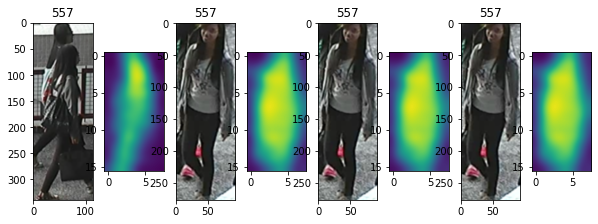

In [114]:
pid = np.random.randint(0, len(pids))
start = np.random.randint(0, len(pid_map[pid]), 4)
%pylab inline
fig=plt.figure(figsize=(10,10))
embeddings = []
for i, j in enumerate(start):
    img = pid_map[pid][j]
    img = Image.open(img)
    with torch.no_grad():
        embedding, output = model_duke(img.convert('RGB'))
        output = output.cpu()
        embeddings.append(embedding.cpu().numpy())

    fig.add_subplot(1, 8, 2*i+1)
    plt.title(pid)
    plt.imshow(img, interpolation='bicubic')
    fig.add_subplot(1, 8, 2*i+2)
    plt.imshow(output, interpolation='bicubic')
plt.show()

In [115]:
X = np.array(embeddings).squeeze()

1-pwdist(X, X, metric='cosine')

array([[1.       , 0.4523936, 0.4523936, 0.4523936],
       [0.4523936, 1.       , 1.       , 1.       ],
       [0.4523936, 1.       , 1.       , 1.       ],
       [0.4523936, 1.       , 1.       , 1.       ]], dtype=float32)

In [57]:
from sklearn.metrics.pairwise import pairwise_distances as pwdist

In [26]:
output

tensor([[-1.1016,  0.6231,  1.0288,  1.0293,  1.0516,  1.0200,  0.4403, -1.1082],
        [-1.0422,  1.0282,  1.0491,  1.0138,  1.0189,  1.0455,  0.9465, -1.0628],
        [ 0.3645,  1.0409,  1.0567,  1.0428,  1.0180,  1.0365,  1.0239,  0.3628],
        [ 0.6907,  1.0380,  1.1178,  1.2088,  1.0832,  0.9890,  1.0374,  0.5807],
        [ 0.6865,  1.0403,  1.1325,  1.1582,  1.0331,  0.9855,  0.8783,  0.4188],
        [ 0.8104,  1.0481,  1.0655,  1.0742,  1.0417,  1.0063,  0.8920,  0.2957],
        [ 0.8726,  1.0472,  1.0325,  1.0887,  1.0264,  0.9887,  0.9405,  0.2369],
        [ 0.9366,  1.0443,  1.0277,  1.0110,  1.0172,  0.9998,  0.9877,  0.2280],
        [ 0.9134,  1.0347,  1.0149,  1.0179,  1.0131,  1.0144,  0.9950,  0.2426],
        [ 0.9041,  1.0308,  1.0189,  1.0245,  1.0263,  0.9933,  1.0061,  0.1996],
        [ 0.9404,  1.0375,  1.0449,  1.0581,  1.0424,  1.0408,  1.0190,  0.1401],
        [ 0.8992,  1.0329,  1.0563,  1.0585,  1.0482,  1.0465,  1.0221,  0.1464],
        [ 0.8300

Populating the interactive namespace from numpy and matplotlib


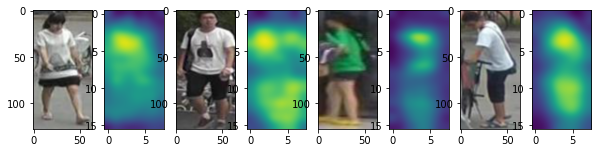

In [28]:
%pylab inline
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(range(start, start+4)):
    img, _, _ = dataset.query[j]
    img = Image.open(img)
    with torch.no_grad():
        output = model_market(img.convert('RGB')).cpu()

    fig.add_subplot(1, 8, 2*i+1)
    plt.imshow(img, interpolation='bicubic')
    fig.add_subplot(1, 8, 2*i+2)
    plt.imshow(output, interpolation='bicubic')
plt.show()

Populating the interactive namespace from numpy and matplotlib


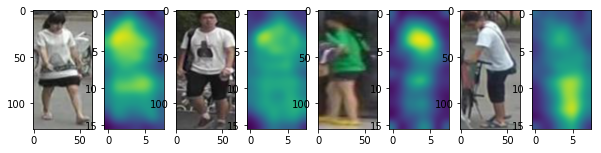

In [29]:
%pylab inline
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(range(start, start+4)):
    img, _, _ = dataset.query[j]
    img = Image.open(img)
    with torch.no_grad():
        output = model_total(img.convert('RGB')).cpu()

    fig.add_subplot(1, 8, 2*i+1)
    plt.imshow(img, interpolation='bicubic')
    fig.add_subplot(1, 8, 2*i+2)
    plt.imshow(output, interpolation='bicubic')
plt.show()

In [30]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid_aligned/"
cfg.DATASET.NAME = "dukemtmcreid"
dataset = data_manager.init_img_dataset(cfg)

2019-08-06 09:41:16,339 logger INFO: => DukeMTMC-reID loaded
2019-08-06 09:41:16,365 logger INFO: Dataset statistics:
2019-08-06 09:41:16,365 logger INFO:   ------------------------------
2019-08-06 09:41:16,366 logger INFO:   subset   | # ids | # images
2019-08-06 09:41:16,367 logger INFO:   ------------------------------
2019-08-06 09:41:16,368 logger INFO:   train    |   702 |    14581
2019-08-06 09:41:16,369 logger INFO:   query    |   695 |     1961
2019-08-06 09:41:16,371 logger INFO:   gallery  |  1109 |    15236
2019-08-06 09:41:16,372 logger INFO:   ------------------------------
2019-08-06 09:41:16,373 logger INFO:   total    |  1397 |    31778
2019-08-06 09:41:16,374 logger INFO:   ------------------------------


Populating the interactive namespace from numpy and matplotlib


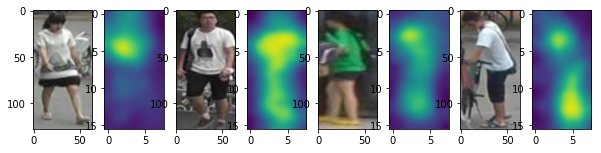

In [36]:
%pylab inline
fig=plt.figure(figsize=(10,10))
for i, j in enumerate(range(start, start+4)):
    img, _, _ = dataset.query[j]
    img = Image.open(img)
    with torch.no_grad():
        output = model_duke_aligned(img.convert('RGB')).cpu()

    fig.add_subplot(1, 8, 2*i+1)
    plt.imshow(img, interpolation='bicubic')
    fig.add_subplot(1, 8, 2*i+2)
    plt.imshow(output, interpolation='bicubic')
plt.show()

In [43]:
from model.OSNetv2 import osnet_x1_0
class ReIDModel(nn.Module):
    def __init__(self):
        super(ReIDModel, self).__init__()
        self.in_planes = 512
        self.backbone = osnet_x1_0(2220, loss='trick')        

        self.gap = nn.AdaptiveAvgPool2d(1)        
        self.BNNeck = nn.BatchNorm2d(self.in_planes)
    
    def forward(self, x):
        feat = self.backbone(x)
        x = self.gap(feat)
        local_feat = x.view(x.size(0), -1)
        x = self.BNNeck(x)
        x = x.view(x.size(0), -1)
        return x        

In [44]:
path = "/media/allen/mass/OSNet_total_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.9531.pth"


In [47]:
checkpoint = torch.load(path)['model']
exec_net = ReIDModel()
model_state = exec_net.state_dict()

checkpointRefine = {}             
for k, v in checkpoint.items():
    if k in model_state and torch.isnan(v).sum() == 0:
        checkpointRefine[k] = v
        logger.info("{:60} ...... loaded".format(k))
    else:
        logger.info("{:60} ...... skipped".format(k))

model_state.update(checkpointRefine)
exec_net.load_state_dict(model_state)

2019-08-06 10:49:42,357 logger INFO: backbone.conv1.conv.weight                                   ...... loaded
2019-08-06 10:49:42,358 logger INFO: backbone.conv1.bn.weight                                     ...... loaded
2019-08-06 10:49:42,360 logger INFO: backbone.conv1.bn.bias                                       ...... loaded
2019-08-06 10:49:42,361 logger INFO: backbone.conv1.bn.running_mean                               ...... loaded
2019-08-06 10:49:42,362 logger INFO: backbone.conv1.bn.running_var                                ...... loaded
2019-08-06 10:49:42,364 logger INFO: backbone.conv1.bn.num_batches_tracked                        ...... loaded
2019-08-06 10:49:42,365 logger INFO: backbone.conv2.0.conv1.conv.weight                           ...... loaded
2019-08-06 10:49:42,366 logger INFO: backbone.conv2.0.conv1.bn.weight                             ...... loaded
2019-08-06 10:49:42,368 logger INFO: backbone.conv2.0.conv1.bn.bias                               ......

2019-08-06 10:49:42,455 logger INFO: backbone.conv2.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,456 logger INFO: backbone.conv2.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-06 10:49:42,457 logger INFO: backbone.conv2.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-06 10:49:42,458 logger INFO: backbone.conv2.0.conv2d.3.bn.weight                          ...... loaded
2019-08-06 10:49:42,460 logger INFO: backbone.conv2.0.conv2d.3.bn.bias                            ...... loaded
2019-08-06 10:49:42,461 logger INFO: backbone.conv2.0.conv2d.3.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,462 logger INFO: backbone.conv2.0.conv2d.3.bn.running_var                     ...... loaded
2019-08-06 10:49:42,463 logger INFO: backbone.conv2.0.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,464 logger INFO: backbone.conv2.0.gate.fc1.weight                             ......

2019-08-06 10:49:42,544 logger INFO: backbone.conv2.1.conv2d.0.bn.weight                          ...... loaded
2019-08-06 10:49:42,546 logger INFO: backbone.conv2.1.conv2d.0.bn.bias                            ...... loaded
2019-08-06 10:49:42,546 logger INFO: backbone.conv2.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,548 logger INFO: backbone.conv2.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-06 10:49:42,549 logger INFO: backbone.conv2.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,550 logger INFO: backbone.conv2.1.conv2d.1.conv1.weight                       ...... loaded
2019-08-06 10:49:42,551 logger INFO: backbone.conv2.1.conv2d.1.conv2.weight                       ...... loaded
2019-08-06 10:49:42,552 logger INFO: backbone.conv2.1.conv2d.1.bn.weight                          ...... loaded
2019-08-06 10:49:42,553 logger INFO: backbone.conv2.1.conv2d.1.bn.bias                            ......

2019-08-06 10:49:42,634 logger INFO: backbone.conv3.0.conv2c.0.bn.running_var                     ...... loaded
2019-08-06 10:49:42,635 logger INFO: backbone.conv3.0.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,637 logger INFO: backbone.conv3.0.conv2c.1.conv1.weight                       ...... loaded
2019-08-06 10:49:42,638 logger INFO: backbone.conv3.0.conv2c.1.conv2.weight                       ...... loaded
2019-08-06 10:49:42,639 logger INFO: backbone.conv3.0.conv2c.1.bn.weight                          ...... loaded
2019-08-06 10:49:42,641 logger INFO: backbone.conv3.0.conv2c.1.bn.bias                            ...... loaded
2019-08-06 10:49:42,642 logger INFO: backbone.conv3.0.conv2c.1.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,643 logger INFO: backbone.conv3.0.conv2c.1.bn.running_var                     ...... loaded
2019-08-06 10:49:42,644 logger INFO: backbone.conv3.0.conv2c.1.bn.num_batches_tracked             ......

2019-08-06 10:49:42,725 logger INFO: backbone.conv3.1.conv2b.0.conv2.weight                       ...... loaded
2019-08-06 10:49:42,727 logger INFO: backbone.conv3.1.conv2b.0.bn.weight                          ...... loaded
2019-08-06 10:49:42,728 logger INFO: backbone.conv3.1.conv2b.0.bn.bias                            ...... loaded
2019-08-06 10:49:42,729 logger INFO: backbone.conv3.1.conv2b.0.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,730 logger INFO: backbone.conv3.1.conv2b.0.bn.running_var                     ...... loaded
2019-08-06 10:49:42,731 logger INFO: backbone.conv3.1.conv2b.0.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,732 logger INFO: backbone.conv3.1.conv2b.1.conv1.weight                       ...... loaded
2019-08-06 10:49:42,733 logger INFO: backbone.conv3.1.conv2b.1.conv2.weight                       ...... loaded
2019-08-06 10:49:42,734 logger INFO: backbone.conv3.1.conv2b.1.bn.weight                          ......

2019-08-06 10:49:42,805 logger INFO: backbone.conv3.2.0.bn.bias                                   ...... loaded
2019-08-06 10:49:42,807 logger INFO: backbone.conv3.2.0.bn.running_mean                           ...... loaded
2019-08-06 10:49:42,808 logger INFO: backbone.conv3.2.0.bn.running_var                            ...... loaded
2019-08-06 10:49:42,810 logger INFO: backbone.conv3.2.0.bn.num_batches_tracked                    ...... loaded
2019-08-06 10:49:42,811 logger INFO: backbone.conv4.0.conv1.conv.weight                           ...... loaded
2019-08-06 10:49:42,812 logger INFO: backbone.conv4.0.conv1.bn.weight                             ...... loaded
2019-08-06 10:49:42,813 logger INFO: backbone.conv4.0.conv1.bn.bias                               ...... loaded
2019-08-06 10:49:42,814 logger INFO: backbone.conv4.0.conv1.bn.running_mean                       ...... loaded
2019-08-06 10:49:42,815 logger INFO: backbone.conv4.0.conv1.bn.running_var                        ......

2019-08-06 10:49:42,894 logger INFO: backbone.conv4.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-06 10:49:42,895 logger INFO: backbone.conv4.0.conv2d.3.bn.weight                          ...... loaded
2019-08-06 10:49:42,896 logger INFO: backbone.conv4.0.conv2d.3.bn.bias                            ...... loaded
2019-08-06 10:49:42,898 logger INFO: backbone.conv4.0.conv2d.3.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,899 logger INFO: backbone.conv4.0.conv2d.3.bn.running_var                     ...... loaded
2019-08-06 10:49:42,899 logger INFO: backbone.conv4.0.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,900 logger INFO: backbone.conv4.0.gate.fc1.weight                             ...... loaded
2019-08-06 10:49:42,901 logger INFO: backbone.conv4.0.gate.fc1.bias                               ...... loaded
2019-08-06 10:49:42,902 logger INFO: backbone.conv4.0.gate.fc2.weight                             ......

2019-08-06 10:49:42,970 logger INFO: backbone.conv4.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,971 logger INFO: backbone.conv4.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-06 10:49:42,972 logger INFO: backbone.conv4.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-06 10:49:42,973 logger INFO: backbone.conv4.1.conv2d.1.conv1.weight                       ...... loaded
2019-08-06 10:49:42,973 logger INFO: backbone.conv4.1.conv2d.1.conv2.weight                       ...... loaded
2019-08-06 10:49:42,974 logger INFO: backbone.conv4.1.conv2d.1.bn.weight                          ...... loaded
2019-08-06 10:49:42,975 logger INFO: backbone.conv4.1.conv2d.1.bn.bias                            ...... loaded
2019-08-06 10:49:42,976 logger INFO: backbone.conv4.1.conv2d.1.bn.running_mean                    ...... loaded
2019-08-06 10:49:42,977 logger INFO: backbone.conv4.1.conv2d.1.bn.running_var                     ......

IncompatibleKeys(missing_keys=[], unexpected_keys=[])